# 16S database comparison

Compares multiple databases: Greengenes, SILVA, NCBI RefSeq, and GTDB

In [41]:
import qiime2 as q2
import pandas as pd
from qiime2.plugins import rescript, taxa as q2t
import tempfile
from glob import glob
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

# Get NCBI data

In [7]:
dbdir = '../../../ref_dbs/'

In [63]:
ncbi_seqs_all, ncbi_taxa_all, = rescript.actions.get_ncbi_data('33175[BioProject] OR 33317[BioProject]')
ncbi_seqs_all.save(dbdir + 'ncbi-refseq/ncbi-refseqs-071420-unfiltered.qza')
ncbi_taxa_all.save(dbdir + 'ncbi-refseq/ncbi-refseqs-taxa-071420-unfiltered.qza')

'../../../ref_dbs/ncbi-refseq/ncbi-refseqs-taxa-071420-unfiltered.qza'

In [64]:
# filter out unusually short seqs
ncbi_seqs, ncbi_discarded, = rescript.actions.filter_seqs_length_by_taxon(
    sequences=ncbi_seqs_all, taxonomy=ncbi_taxa_all,
    labels=['Archaea', 'Bacteria'], min_lens=[900, 1200])

ncbi_taxa = ncbi_taxa_all.view(pd.Series)
ncbi_taxa = ncbi_taxa.loc[ncbi_taxa.view(pd.Series).index]
ncbi_taxa.index.name = 'Feature ID'
ncbi_taxa = q2.Artifact.import_data('FeatureData[Taxonomy]', ncbi_taxa)

ncbi_seqs.save(dbdir + 'ncbi-refseq/ncbi-refseqs-071420.qza')
ncbi_taxa.save(dbdir + 'ncbi-refseq/ncbi-refseqs-taxa-071420.qza')

'../../../ref_dbs/ncbi-refseq/ncbi-refseqs-taxa-071420.qza'

In [78]:
junk_seqs = ncbi_discarded.view(pd.Series)
junk_taxa = ncbi_taxa_all.view(pd.Series).loc[junk_seqs.index]
junk_taxa

NR_169410.1    k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Corynebacteriales; f__Nocardiaceae; g__Williamsia; s__aurantiacus                                  
NR_157649.1    k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rickettsiales; f__Anaplasmataceae; g__Ehrlichia; s__muris subsp. eauclairensis                
NR_157641.1    k__Bacteria; p__Firmicutes; c__Bacilli; o__Bacillales; f__Sporolactobacillaceae; g__Sporolactobacillus; s__shoreicorticis                                
NR_156167.1    k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Alteromonadales; f__Idiomarinaceae; g__Aliidiomarina; s__soli                                 
NR_152085.1    k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Vibrionales; f__Vibrionaceae; g__Vibrio; s__cidicii                                           
                                                                    ...                                                                                    

In [79]:
junk_seqs.apply(len).value_counts().sort_index()

302     1
367     1
459     1
460     1
525     1
       ..
1191    1
1192    2
1193    1
1195    1
1196    1
Length: 91, dtype: int64

# Get GTDB data

r95 beta release retrieved July 13, 2020, whilst sitting in the sun, Mendocino, CA

In [9]:
gtdbdir = dbdir + 'gtdb/'
!mkdir {gtdbdir}

In [ ]:
!wget -O {gtdbdir + 'bac120_ssu_r95.fasta'} https://data.ace.uq.edu.au/public/gtdb/data/releases/release_beta/95.0/bac120_ssu_r95.tsv
!wget -O {gtdbdir + 'bac120_taxonomy_r95.tsv'} https://data.ace.uq.edu.au/public/gtdb/data/releases/release_beta/95.0/bac120_taxonomy_r95.tsv
!wget -O {gtdbdir + 'ar122_ssu_r95.fasta'} https://data.ace.uq.edu.au/public/gtdb/data/releases/release_beta/95.0/ar122_ssu_r95.tsv
!wget -O {gtdbdir + 'ar122_taxonomy_r95.tsv'} https://data.ace.uq.edu.au/public/gtdb/data/releases/release_beta/95.0/ar122_taxonomy_r95.tsv

In [15]:
gtdb_seqs_fp = gtdbdir + 'gtdb_ssu_r95.fasta'
gtdb_taxa_fp = gtdbdir + 'gtdb_taxonomy_r95.tsv'


In [17]:
!cat {gtdbdir + 'bac120_ssu_r95.fasta'} {gtdbdir + 'ar122_ssu_r95.fasta'} > {gtdb_seqs_fp}
!cat {gtdbdir + 'bac120_taxonomy_r95.tsv'} {gtdbdir + 'ar122_taxonomy_r95.tsv'} > {gtdb_taxa_fp}

In [47]:
gtdb_seqs_all = q2.Artifact.import_data('FeatureData[Sequence]', gtdb_seqs_fp)
gtdb_taxa_all = q2.Artifact.import_data('FeatureData[Taxonomy]', gtdb_taxa_fp,
                                        view_type='HeaderlessTSVTaxonomyFormat')

In [49]:
# filter out unusually short seqs
gtdb_seqs, gtdb_discarded, = rescript.actions.filter_seqs_length_by_taxon(
    sequences=gtdb_seqs_all, taxonomy=gtdb_taxa_all,
    labels=['Archaea', 'Bacteria'], min_lens=[900, 1200])

gtdb_taxa = gtdb_taxa_all.view(pd.Series)
gtdb_taxa = gtdb_taxa.loc[gtdb_seqs.view(pd.Series).index]
gtdb_taxa.index.name = 'Feature ID'
gtdb_taxa = q2.Artifact.import_data('FeatureData[Taxonomy]', gtdb_taxa)


In [80]:
junk_seqs = gtdb_discarded.view(pd.Series)
junk_taxa = gtdb_taxa_all.view(pd.Series).loc[junk_seqs.index]
junk_taxa

G000168735    d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Chromatiales;f__Sedimenticolaceae;g__Endoriftia;s__Endoriftia persephone      
G000183865    d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria;s__Listeria marthii                               
G000192415    d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Propionibacteriales;f__Nocardioidaceae;g__Nocardioides;s__Nocardioides sp000192415
G000210015    d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Blautia_A;s__Blautia_A obeum_B                      
G000210555    d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Coprococcus_A;s__Coprococcus_A catus                
                                                                       ...                                                                          
G013331575    d__Archaea;p__Nanoarchaeota;c__Nanoarchaeia;o__Woesearchaeales;f__UBA525;g__UBA525;s__UBA525

In [83]:
junk_seqs.apply(len).value_counts().sort_index()

200     3
201     4
202     5
203     1
204     3
       ..
1193    2
1194    1
1195    1
1198    1
1199    2
Length: 949, dtype: int64

# Get SILVA data

In [22]:
silvadir = dbdir + 'SILVA_138/'
!mkdir {silvadir}

silva_seqs_fp = silvadir + 'silva-138-99-seqs.qza'
silva_taxa_fp = silvadir + 'silva-138-99-tax.qza'


In [ ]:
!wget -O {silva_seqs_fp} https://data.qiime2.org/2020.6/common/silva-138-99-seqs.qza
!wget -O {silva_taxa_fp} https://data.qiime2.org/2020.6/common/silva-138-99-tax.qza

In [39]:
silva_seqs_all = q2.Artifact.load(silva_seqs_fp)
silva_taxa_all = q2.Artifact.load(silva_taxa_fp)

In [44]:
# Filter out 18S seqs from SILVA
include = 'd__Bacteria,d__Archaea'

silva_taxa = silva_taxa_all.view(pd.Series)
silva_taxa = silva_taxa[silva_taxa.str.contains(include.replace(',', '|'))]
silva_taxa = q2.Artifact.import_data('FeatureData[Taxonomy]', silva_taxa)

silva_seqs, = q2t.actions.filter_seqs(silva_seqs_all, silva_taxa_all, include=include)

# Load GG data

In [33]:
ggdir = dbdir + 'gg_13_8_otus/'
gg_seqs, = q2.Artifact.import_data('FeatureData[Sequence]',
                                   ggdir + 'rep_set/99_otus.fasta'),
gg_taxa = q2.Artifact.import_data('FeatureData[Taxonomy]',
                                  ggdir + 'taxonomy/99_otu_taxonomy.txt',
                                  view_type='HeaderlessTSVTaxonomyFormat')

# Compare sequence information

In [96]:
db_labels = ['silva_99', 'greengenes_99', 'GTDB', 'NCBI-RefSeq']

# with junky short seqs
seqs_eval, = rescript.actions.evaluate_seqs(
    sequences = [silva_seqs, gg_seqs, gtdb_seqs_all, ncbi_seqs_all],
    labels = db_labels,
    palette = 'cividis')
seqs_eval.save('../data/eval/compare_16S_seqs_eval_unfiltered.qzv')
# with filtered final seqs
seqs_eval, = rescript.actions.evaluate_seqs(
    sequences = [silva_seqs, gg_seqs, gtdb_seqs, ncbi_seqs],
    labels = db_labels,
    palette = 'cividis')
seqs_eval.save('../data/eval/compare_16S_seqs_eval.qzv')


# Compare taxonomic information

In [90]:
taxonomies = [silva_taxa, gg_taxa, gtdb_taxa, ncbi_taxa]

tax_eval, = rescript.actions.evaluate_taxonomy(
    taxonomies = taxonomies,
    labels = db_labels)
tax_eval.save('../data/eval/compare_16S_taxonomic_eval.qzv')
tax_eval, = rescript.actions.evaluate_taxonomy(
    taxonomies = taxonomies,
    labels = db_labels,
    rank_handle_regex="^[dkpcofgs]__")
tax_eval.save('../data/eval/compare_16S_taxonomic_eval_dropemptyranks.qzv')

'../data/eval/compare_16S_taxonomic_eval_dropemptyranks.qzv'

# Make a pretty plot

In [91]:
fig_data = dict()
with tempfile.TemporaryDirectory() as temp_dir_name:
    for f in glob('../data/eval/compare_16S_taxonomic_*.qzv'):
        name = f.split('/')[-1].split('.qzv')[0]
        f = q2.Visualization.load(f)
        f.export_data(temp_dir_name)
        fig_data[name] = q2.Metadata.load(temp_dir_name + '/data.tsv').to_dataframe()


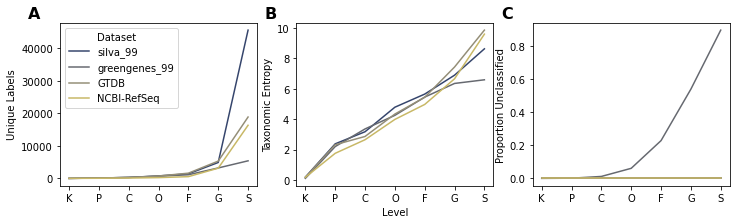

In [104]:
plot_keys = ['compare_16S_taxonomic_eval',
             'compare_16S_taxonomic_eval',
             'compare_16S_taxonomic_eval_dropemptyranks']
signals = ['Unique Labels',
           'Taxonomic Entropy',
           'Proportion of Features Unclassified at Depth']
labels = list('ABCDEF')

fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharex=False)
axes = axes.flatten()
for ax, key, signal, label in zip(axes, plot_keys, signals, labels):
    ax.text(-0.1, 1.1, label, transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='right')
    dat = fig_data[key].copy()
    #dat.loc[:, 'Dataset'] = dat.loc[:, 'Dataset'].replace(relabels)
    dat = dat[dat['Dataset'] != 'drop']
    dat['Level'] = dat['Level'].replace({
        1: 'K', 2: 'P', 3: 'C', 4: 'O',
        5: 'F', 6: 'G', 7: 'S'})
    if ax == axes[0]:
        legend = 'brief'
    else:
        legend = False
    g = sns.lineplot(x='Level', y=signal, hue='Dataset', data=dat, ax=ax,
                     legend=legend, palette='cividis', sort=False,
                     hue_order=db_labels)
    if ax == axes[2]:
        ax.set_ylabel('Proportion Unclassified')
    if ax != axes[1]:
        ax.set_xlabel('')
fig.savefig('../data/plots/compare_16S_taxonomy_evaluation.pdf', bbox_inches='tight')
